In [106]:
import numpy as np
import pandas as pd

sound_data = pd.read_csv('datasets/jrelabeled.csv')
rogan_data = sound_data[sound_data['label'] == 1]
X = rogan_data.drop(['filename', 'label', 'predictions'], axis=1)
y = rogan_data['label']
X

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.490575,0.025069,2171.913549,2139.885722,4431.553141,0.101278,-380.533020,112.694641,-31.796848,1.780545,...,10.122002,-1.219215,-5.020499,-8.176243,-6.034646,5.141100,-4.364628,-1.783790,-1.651915,-2.534616
1,0.441578,0.031176,2452.753355,2400.318018,5115.332031,0.126144,-353.482391,92.485397,-3.311667,21.250517,...,-3.828105,-2.363839,-5.873488,2.105093,-7.501835,2.208278,-3.906220,-3.250791,-2.498704,0.930458
2,0.391119,0.049024,2102.894499,2018.743044,3995.107015,0.106585,-298.112457,105.581268,-1.911337,38.332870,...,-2.136520,-4.300785,-13.941048,0.797238,-8.774372,-1.213172,-6.336737,-4.957156,-6.576495,-1.673529
5,0.469809,0.037327,2239.813927,2191.132913,4524.066162,0.112287,-324.963318,108.212601,-16.467024,26.865139,...,-2.978554,-0.770890,-7.123728,3.142917,-7.908026,0.713636,-4.640324,-4.185403,-4.470373,4.049245
6,0.370643,0.060327,2311.597408,1842.221912,4046.746826,0.141018,-244.242737,101.293144,-26.639498,17.342655,...,0.350607,-7.042977,-17.581421,0.219237,-15.416845,-2.527660,-6.503064,-7.859387,-11.159444,-1.384048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3242,0.356650,0.047945,1875.206792,2011.394776,3719.262695,0.086955,-325.677155,111.947113,-19.987749,29.178240,...,-1.507889,-10.745831,-11.072523,3.140289,-9.441021,-2.043447,-7.869081,-3.900815,-5.934636,-5.424959
3243,0.418247,0.027666,2149.070819,2065.644387,3919.940186,0.128052,-340.059937,110.586372,10.451983,19.440601,...,-0.977616,0.093682,-12.989449,-0.653208,-10.991277,-1.288508,-9.050515,-6.237614,-6.182709,-0.446258
3244,0.516676,0.033100,3366.970347,2442.907014,6044.848633,0.200968,-245.022491,64.018867,-0.729588,22.069118,...,-8.183720,3.516187,-11.182924,7.685889,-5.441451,3.312333,-6.929044,1.630977,-6.188900,-3.245280
3245,0.365482,0.047379,2386.868417,2021.569844,4224.794515,0.150748,-264.907867,95.900337,-6.250965,22.815989,...,-3.221453,-2.687887,-11.195713,6.814785,-10.712571,-0.877225,-6.911509,-4.541855,-8.026425,-5.267250


In [107]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

st_scaler = StandardScaler()
rfeatures = st_scaler.fit_transform(X)

efeatures = PCA(n_components=2).fit_transform(rfeatures)

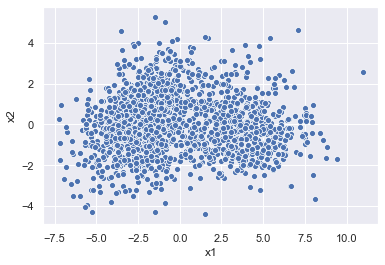

In [108]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

reduced_data = pd.DataFrame(efeatures, columns=['x1', 'x2'])
sns.scatterplot(x='x1', y='x2', data=reduced_data)

In [109]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=1)
km.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [112]:
center = km.cluster_centers_[0]

In [119]:
from sklearn.metrics.pairwise import euclidean_distances

distances = euclidean_distances(X, [center])

In [120]:
pd.Series(distances[:,0]).describe()

count    1734.000000
mean      947.531027
std       615.849142
min        37.007955
25%       453.558773
50%       841.115253
75%      1335.734963
max      4146.903202
dtype: float64

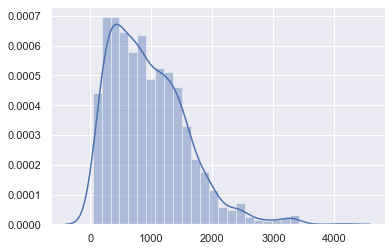

In [121]:
sns.distplot(distances[:,0])

In [122]:
from pydub import AudioSegment
import librosa
import pathlib
import os



def preprocessing(filename):
    

    y, sr = librosa.load(f"audio/{filename}.wav", mono=True)
    
    
    rmse = librosa.feature.rms(y=y) #root mean squred ENERGY note. changed to rms form rmse
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    
    to_append = f'{np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'

    for e in mfcc:
        to_append += f' {np.mean(e)}'
    
    scaled_data = st_scaler.transform([to_append.split()])
    
    #return scaled_data
    return [to_append.split()]

In [123]:
vector = preprocessing(f'roganclimate/roganclimate41')

In [124]:
euclidean_distances(vector, [center])

array([[703.88903091]])

In [125]:
elon_data = sound_data[sound_data['label'] == 0].drop(['predictions', 'label', 'filename'], axis=1)

In [101]:
vectors = st_scaler.transform(elon_data)

In [126]:
edistances = euclidean_distances(elon_data, [center])

In [127]:
pd.Series(edistances[:,0]).describe()

count    1140.000000
mean      572.553137
std       377.750307
min        28.019094
25%       284.812217
50%       469.507070
75%       789.234772
max      2274.464427
dtype: float64